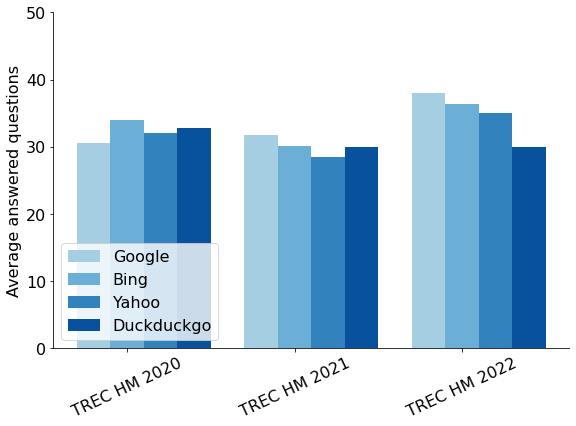

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the new histogram, reorganized
data = {
    "Google": [30.5, 31.8, 38],
    "Bing":  [34, 30.1, 36.3],
    "Yahoo":  [32.1, 28.4, 35],
    "Duckduckgo":  [32.7, 30, 30],
}

# Categories and values for each category
search_engines = list(data.keys())
years = ["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"]

# Colors based on the given image
colors = ['#a6cee3', '#6baed6', '#3182bd', '#08519c']

# Plotting the histogram
x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

# Adding bars for each search engine
for i, (engine, values) in enumerate(data.items()):
    rects = ax.bar(x + i * width, values, width, label=engine, color=colors[i])

# Adding some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('TREC HM Year')
ax.set_ylabel('Average answered questions', fontsize=16)
# ax.set_title('Mean number of answered health questions')
ax.set_xticks(x + width)
ax.set_xticklabels(years, fontsize=16, rotation=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower left', fontsize=16)

# Configurando el rango del eje y hasta 50
ax.set_ylim(0, 50)

fig.tight_layout()
plt.yticks(fontsize=16)
plt.savefig('answers-per-engine.png', bbox_inches='tight')
plt.show()


              Correct Decisions  Incorrect Decisions  No decision
TREC HM 2020                 75                   25            0
TREC HM 2021                 80                   20            0
TREC HM 2022                 80                   18            2


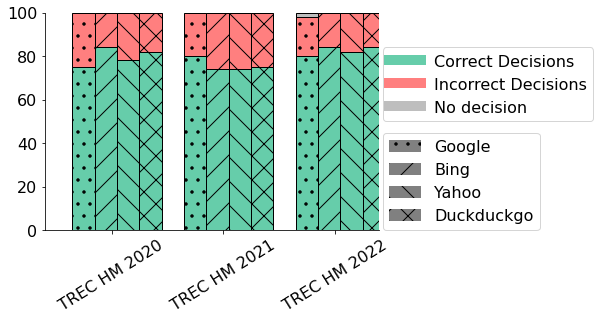

In [21]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig,axe = plt.subplots()
    colors = ['#66CDAA', '#FF7F7F', '#BEBEBE']  # Define the more intense colors for each response type
    patterns = ['.', '/', '\\', 'x']  # Define subtle patterns for differentiation  # Define subtle patterns for differentiation
    for df, pattern in zip(dfall, patterns):   # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=1,  # Set linewidth for edges
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      edgecolor='black',  # Set edge color
                      color=colors,  # Set the colors
                      **kwargs)  # make bar plots
            
    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i + n_col]):
            pattern = patterns[i // n_col]
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(pattern) #edited part     
                rect.set_width(1 / float(n_df + 1))
    

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, fontsize=16, rotation = 32)
    axe.tick_params(axis='y', labelsize=16)
    #axe.set_title(title)
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)
    axe.set_ylim(0, 100)

    # Add invisible data to add another legend
    n = []        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=patterns[i]))

    # Legend for the colors (Responses)
    handles_color = [plt.Line2D([0], [0], color=color, lw=10) for color in colors]
    labels_color = dfall[0].columns
    l1 = axe.legend(handles_color, labels_color, loc=[1.01, 0.5], fontsize=16)

    # Legend for the patterns (Search Engines)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.0], fontsize=16)
    axe.add_artist(l1)
    #
    #fig.tight_layout(pad=1.)
    return axe

# Lazy user
google = pd.DataFrame([[75, 25, 0], [80, 20, 0], [80, 18, 2]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Decisions", "Incorrect Decisions", "No decision"])
bing = pd.DataFrame([[84, 16, 0], [74, 26, 0], [84, 16, 0]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])
yahoo = pd.DataFrame([[78, 22, 0], [74, 26, 0], [82, 18, 0]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])

duckduckgo = pd.DataFrame([[82, 18, 0], [75, 25, 0], [84, 16, 0]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])

print(google)

# Then, just call :
plot_clustered_stacked([google, bing, yahoo, duckduckgo],["Google", "Bing", "Yahoo", "Duckduckgo"])
plt.savefig('lazy_user.png', bbox_inches='tight')

              Correct Decision  Incorrect Decision  No decision
TREC HM 2020                63                  37            0
TREC HM 2021                72                  26            2
TREC HM 2022                80                  18            2


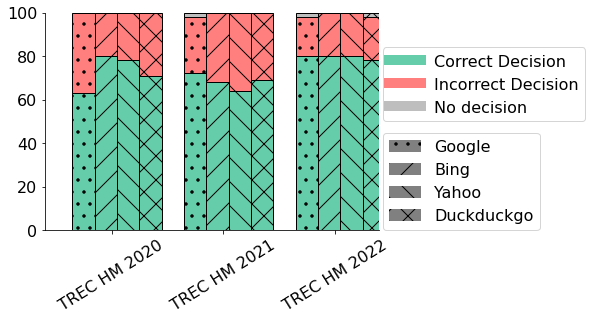

In [22]:
### Diligent user

google = pd.DataFrame([[63, 37, 0], [72, 26, 2], [80, 18, 2]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Decision", "Incorrect Decision", "No decision"])
bing = pd.DataFrame([[80, 20, 0], [68, 32, 0], [80, 20, 0]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])
yahoo = pd.DataFrame([[78, 22, 0], [64, 36, 0], [80, 20, 0]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])

duckduckgo = pd.DataFrame([[71, 29, 0], [69, 31, 0], [78, 20, 2]],
                   index=["TREC HM 2020", "TREC HM 2021", "TREC HM 2022"],
                   columns=["Correct Responses", "Incorrect Responses", "No answer"])

print(google)

# Then, just call :
plot_clustered_stacked([google, bing, yahoo, duckduckgo],["Google", "Bing", "Yahoo", "Duckduckgo"])
plt.savefig('diligent_user.png', bbox_inches='tight')

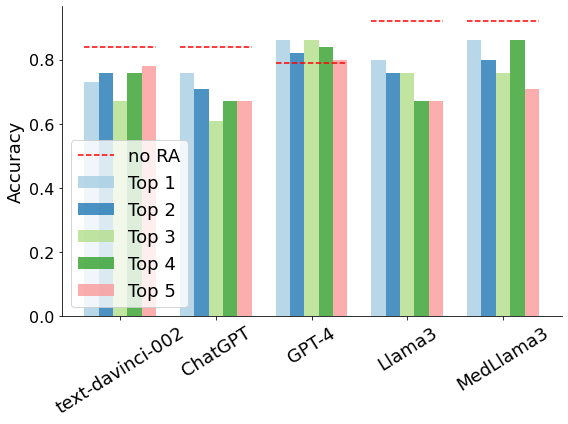

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.73, 0.76, 0.86, 0.8, 0.86]
top2 = [0.76, 0.71, 0.82, 0.76, 0.8]
top3 = [0.67, 0.61, 0.86, 0.76, 0.76]
top4 = [0.76, 0.67, 0.84, 0.67, 0.86]
top5 = [0.78, 0.67, 0.80, 0.67, 0.71]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.84, 0.84, 0.79, 0.92, 0.92] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower left', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-2020.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

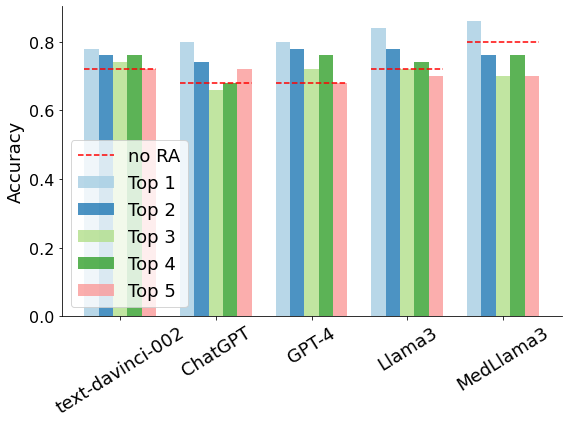

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.78, 0.8, 0.8, 0.84, 0.86]
top2 = [0.76, 0.74, 0.78, 0.78, 0.76]
top3 = [0.74, 0.66, 0.72, 0.72, 0.7]
top4 = [0.76, 0.68, 0.76, 0.74, 0.76]
top5 = [0.72, 0.72, 0.68, 0.7, 0.7]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.72, 0.68, 0.68, 0.72, 0.8] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower left', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-2021.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

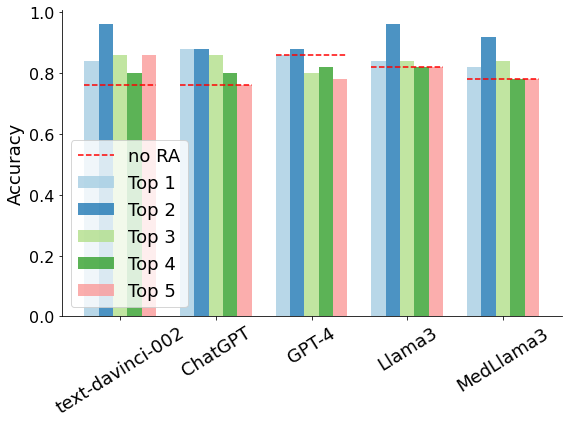

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.84, 0.88, 0.86, 0.84, 0.82]
top2 = [0.96, 0.88, 0.88, 0.96, 0.92]
top3 = [0.86, 0.86, 0.8, 0.84, 0.84]
top4 = [0.8, 0.8, 0.82, 0.82, 0.78]
top5 = [0.86, 0.76, 0.78, 0.82, 0.78]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.76, 0.76, 0.86, 0.82, 0.78] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower left', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-2022.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

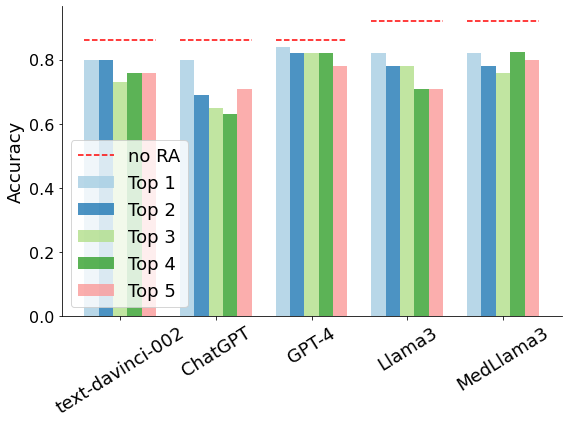

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.8, 0.8, 0.84, 0.82, 0.82]
top2 = [0.8, 0.69, 0.82, 0.78, 0.78]
top3 = [0.73, 0.65, 0.82, 0.78, 0.76]
top4 = [0.76, 0.63, 0.82, 0.71, 0.825]
top5 = [0.76, 0.71, 0.78, 0.71, 0.8]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.86, 0.86, 0.86, 0.92, 0.92] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower left', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-expert-2020.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

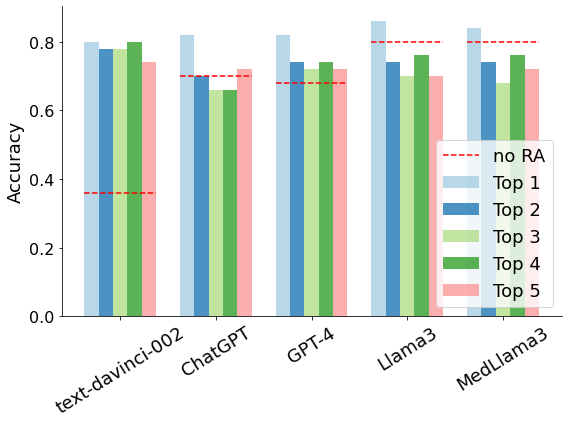

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.8, 0.82, 0.82, 0.86, 0.84]
top2 = [0.78, 0.7, 0.74, 0.74, 0.74]
top3 = [0.78, 0.66, 0.72, 0.7, 0.68]
top4 = [0.8, 0.66, 0.74, 0.76, 0.76]
top5 = [0.74, 0.72, 0.72, 0.7, 0.72]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.36, 0.70, 0.68, 0.8, 0.8] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower right', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-expert-2021.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

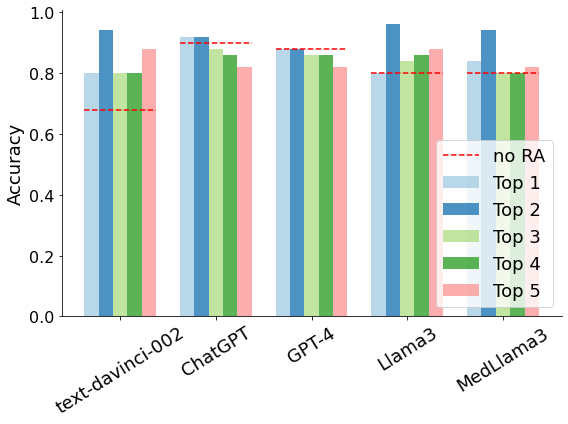

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
models = ["text-davinci-002", "ChatGPT", "GPT-4", "Llama3", "MedLlama3"]
x = np.arange(len(models))  # Posiciones en el eje X

# Valores para las barras (proporción de respuestas correctas)
top1 = [0.8, 0.92, 0.88, 0.8, 0.84]
top2 = [0.94, 0.92, 0.88, 0.96, 0.94]
top3 = [0.8, 0.88, 0.86, 0.84, 0.8]
top4 = [0.8, 0.86, 0.86, 0.86, 0.8]
top5 = [0.88, 0.82, 0.82, 0.88, 0.82]

bar_width = 0.15  # Ancho de las barras

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8,6))

# Dibujar las barras
ax.bar(x - 2*bar_width, top1, width=bar_width, label="Top 1", color="#a6cee3", alpha=0.8)
ax.bar(x - bar_width, top2, width=bar_width, label="Top 2", color="#1f78b4", alpha=0.8)
ax.bar(x, top3, width=bar_width, label="Top 3", color="#b2df8a", alpha=0.8)
ax.bar(x + bar_width, top4, width=bar_width, label="Top 4", color="#33a02c", alpha=0.8)
ax.bar(x + 2*bar_width, top5, width=bar_width, label="Top 5", color="#fb9a99", alpha=0.8)

# Añadir las líneas horizontales punteadas para "no RA"
no_ra = [0.68, 0.9, 0.88, 0.8, 0.8] ## no context 2020
for i, y in enumerate(no_ra):
    ax.hlines(y, x[i] - 2.5*bar_width, x[i] + 2.5*bar_width, colors='red', linestyles='--', label="no RA" if i == 0 else "")

# Etiquetas y título
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xticks(x)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(models, fontsize=18, rotation=32)
ax.legend(loc='lower right', fontsize=18)

# Mostrar la figura
plt.yticks(fontsize=16)
plt.savefig('rag-expert-2022.png', bbox_inches='tight')
plt.tight_layout()
plt.show()